# Using Python and Pandas to investigate MP's expenses

I am interested in practising using pandas Python module, and so thought I would take a look at the expenses claims made by UK members of Parliament over the last five years, which is available from the <a href='http://www.parliamentary-standards.org.uk/.'>Independent Parliamentary Standards Authority (IPSA)</a>. As I live in Coventry, I'll be focusing primarily on the three Coventry constituencies, particularly the constituency of Coventry North West, where <a href='http://www.parliament.uk/biographies/commons/mr-geoffrey-robinson/307'>Geoffrey Robinson</a> serves as the MP. 

The data from IPSA is available in a csv format and gives details of individual expense claims from MPs since 2010. IPSA was formed as a response to the <a href='https://en.wikipedia.org/wiki/United_Kingdom_parliamentary_expenses_scandal'>MPs expenses scandal</a> of 2009. As a consequence of this scandal, there were many resignations, MPs losing their seats in the 2010 general election, and even criminal charges in some cases. I was interested to find out whether, now that media interest has died down in this story, the MPs are continuing to show restraint after a brief flash of media scrutiny or whether they are returning to a regime of lavish expenses claims, like those seen in 2009 when an MP claimed over £1,500 for an <a href='http://www.theguardian.com/politics/2009/may/23/mps-expenses-conservatives'>island to house his ducks</a>.

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import matplotlib.cm

%matplotlib inline

In [2]:
# Creates generator of IPSA data files between 2010/11 - 2015/16
Files = (fi for fi in os.listdir('./Data')
         if fi.endswith('csv'))

In [3]:
# Create single dataframe
Total = pd.concat((pd.read_csv(os.path.join('./Data', fi), skipinitialspace=True)) for fi in Files)

In [4]:
# Re-format some columns
Total = Total.drop("\xef\xbb\xbfYear", 1)
Total['Date'] = pd.to_datetime(Total.Date, format='%d/%m/%Y')
Total['Year'] = Total['Date'].dt.year

In [5]:
# Shuffling data in more useful format - grouping by Constituency and year
Total = Total.set_index(["MP's Constituency", "Year"], drop=False)
Total = Total.sort_index()
Total.head()

Date Claim No.      MP's Name MP's Constituency  \
MP's Constituency Year                                                         
Aberavon CC       2010 2010-10-28     43073  Hywel Francis       Aberavon CC   
                  2010 2010-11-16     48519  Hywel Francis       Aberavon CC   
                  2010 2010-09-22     32414  Hywel Francis       Aberavon CC   
                  2010 2010-08-26     25379  Hywel Francis       Aberavon CC   
                  2010 2010-06-26      7821  Hywel Francis       Aberavon CC   

                             Category              Expense Type  \
MP's Constituency Year                                            
Aberavon CC       2010         Travel   Congestion Zone/Toll MP   
                  2010         Travel   Congestion Zone/Toll MP   
                  2010  General Admin                     Other   
                  2010  General Admin  Payment Telephone/Mobile   
                  2010         Travel   Congestion Zone/Toll MP   

                                     Short Description  \
MP's Constituency Year                                   
Aberavon CC       2010   Congestion and Bridge charges   
                  2010   Congestion and Bridge charges   
                  2010           Banner Bill Sept 2010   
                  2010         Telephone/mobile Aug 10   
                  2010  Congestion/Bridge Charges June   

                                                                  Details  \
MP's Constituency Year                                                      
Aberavon CC       2010  Severn Bridge crossing Thursday 21st October 2010   
                  2010                   Severn Bridge charge 10 Nov 2010   
                  2010        Printer cartridges for caseworker's printer   
                  2010                                    t mobile Aug 10   
                  2010                         Congestion Charge 23.06.10   

                                     Journey Type From  ...  Travel Nights  \
MP's Constituency Year                                  ...                  
Aberavon CC       2010  Westminster to Const Home  NaN  ...     NaN    0.0   
                  2010  Westminster to Const Home  NaN  ...     NaN    0.0   
                  2010                        NaN  NaN  ...     NaN    0.0   
                  2010                        NaN  NaN  ...     NaN    0.0   
                  2010  Westminster to Const Home  NaN  ...     NaN    0.0   

                        Mileage  Amount Claimed  Amount Paid  Amount Not Paid  \
MP's Constituency Year                                                          
Aberavon CC       2010      0.0            5.50         5.50              0.0   
                  2010      0.0            5.50         5.50              0.0   
                  2010      0.0          225.65       225.65              0.0   
                  2010      0.0           29.73        29.73              0.0   
                  2010      0.0            8.00         8.00              0.0   

                        Amount Repaid  Status Reason If Not Paid  Year  
MP's Constituency Year                                                  
Aberavon CC       2010            0.0    Paid                NaN  2010  
                  2010            0.0    Paid                NaN  2010  
                  2010            0.0    Paid                NaN  2010  
                  2010            0.0    Paid                NaN  2010  
                  2010            0.0    Paid                NaN  2010  

[5 rows x 21 columns]

As you can see from the above cell, the IPSA data gives data that you should expect to be given, such as the amount that has been claimed, whether the claim has been successful, when the claim was made, and a short description of the expense that is being claimed. As the data is sorted alphabetically using the constituency name, it is no surprise to see claims from the Aberavon MP Hywel Francis show up on the head of the data frame. Equally unsurprising for a south Wales MP is to see several claims for £ 5.50 toll for the Severn bridge crossing. 

The data source is so rich that there are a hundred and one lines of inquiry, but I will just explore a few interesting features that I have noticed from my own MP's expenses claim, and will be comparing him with two other Coventry MPs. I can do this by filtering out the results from the main dataframe so that only claims made by MPs with "Coventry" in their constituency name are considered.

In [6]:
# Only interested in MP's from Coventry
CovTotal = Total[Total["MP's Constituency"].str.contains("Coventry")]

Now we can have a look at the headline figures: how many individual claims were made between 2010 and 2015, and what was the net total paid out to the Coventry MPs in that period:

In [7]:
# Total numer of entries
len(CovTotal)

2627

In [8]:
# Net Amount claimed in Coventry over those years
tot = CovTotal['Amount Paid'].sum()
print('£ {:,.2f}'.format(tot))

£ 1,076,092.34


So, over this six year period, over a million pounds has been claimed by the three Coventry MPs! Of course, it should be remembered that this million pounds has been claimed over a six year period by three people...but even still, this works out at an mean annual claim of around £60,000! 

But we can break this number down by looking at the annual claim by each MP.

In [9]:
# Create annual summary of total spent each year in each constituency
AnnualSummary = CovTotal.groupby(["MP's Constituency", "Year"])['Amount Paid'].sum()

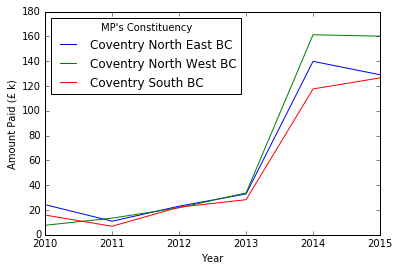

In [10]:
# Plot results to see evolution of expenses paid over last 6 years
ax = (1e-3*AnnualSummary).unstack().T.plot(style='-')
ax.set_ylabel(u'Amount Paid (£ k)')
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)

#### Increasing Claims
From the graph above, there is a clear step change in the money claimed from 2013 to 2014, with the annual claim increasing by a whopping £100,000! Looking at the data, it appears that MPs have suddenly become greedy again in 2014. Of course, this is not the case, and looking at the claims made, it appears that from 2014 staffing costs have are declared as an expense. Of course, these staffing costs were always claimed, it is just that they have been reallocated as an expense and so suddenly appear on the IPSA data. Looking through the IPSA guidelines, it appears that non-London based MPs have a £140,000 budget to cover staffing costs, with an additional £7,000 available to London MPs.

However, even when disregarding this increase in claims due to the reallocation of staff costs, there is an interesting trend, which is particularly noticeable for my MP for Coventry North West. The first year that data is available, 2010, is only a year after the expenses scandal initial broke in the news, with a new story breaking almost every week. In addition, 2010 was an election year, with candidates wanting to distance themselves from the excessive expenses claimed by some of their collegues. Clearly, all of these influences caused the total expenses claims to be quite low. However, as time progressed and the expenses scandal moves further to the back of everyone's collective mind, the amount paid in expenses is steadily increasing. For instance, after being awarded only £7,690.37 in 2010, Geoffrey Robinson received £32,956.49 in 2013. Of course, there may be another reason for this four fold increase, and so I have written to him for clarification. Once I receive a reply, I will update this notebook to reflect his comments. It is also worth commenting on the fact that in 2015, which is the last year that we have data for, Geoffrey Robinson is claiming approximately £30,000 more than his two neighbouring MPs; again, I await with interest any explanation as to why this may be. 

#### Train Travel
Another interesting thing I noticed when I was browsing through the expenses list is the number of times that Mr Robinson was claiming for first class rail travel between his Coventry constituency base and London for his work in the House of Commons. Again, I was interested in how he compared with his peers - this time both in Coventry and in the country as a whole. First, we need to separate out all travel claims into first class and standard class travel, and make sure that we only look at those claims that have been paid. Firstly, let's look at all the Coventry MPs, as they will have to use the same train station.

In [11]:
# Looking at Standard-First class travel ratio
Std = CovTotal[(CovTotal['Travel'] == "Standard") & (CovTotal['Status'] == "Paid")]
First = CovTotal[(CovTotal['Travel'] == "First") & (CovTotal['Status'] == "Paid")]

In [12]:
# Separate out First class and standard travel and calculate percentage of first class travel
FirstSum = First.groupby(["MP's Constituency", "Year"])['Travel'].count()
StdSum = Std.groupby(["MP's Constituency", "Year"])['Travel'].count()
First_Percent = 100. * FirstSum / (FirstSum + StdSum)
FirstPercent = First_Percent.fillna(0)

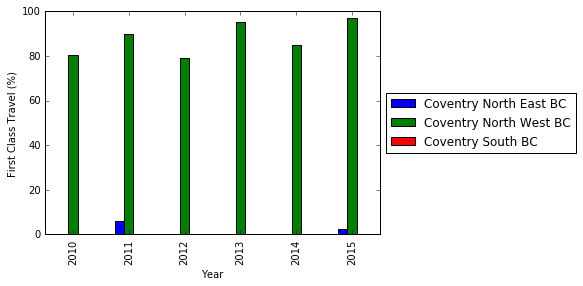

In [13]:
# Plotting Results
ax = FirstPercent.unstack().T.plot(kind='bar')
ax.set_ylabel('First Class Travel (%)')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Looking at the figure above, the data looks pretty damning. The MP for Coventry South, <a href='http://www.jimcunningham.org.uk/'>Jim Cunningham</a>, has not made a single claim for first class train travel. Indeed, even the MP for Coventry North East has only sporadically travelled by first class, potentially as it can sometimes work out a little cheaper. However, Geoffrey Robinson appears to be travelling via first class for more than 80 % of the time. The <a href='http://parliamentarystandards.org.uk/IPSAMPs/Guidance/SiteAssets/Pages/home/Guidance-for-MPs-Business-Costs-and-Expenses.pdf'>MP's guidance handbook</a> advises that claims for first class travel are allowed if it represents value for money. I can see how, in some circumstances, first class travel might be cheaper than standard class due to special offers. But it seems very unlikely that first class tickets are cheaper than standard class tickets over 80 % of the time; and if this is true, why aren't the other MPs making use of these deals? 

Perhaps, though, the total sum that is claimed is not as high as his fellow Coventry MPs' expenses claims. The important thing is the total money claimed from the taxpayer, not the relative amount of first-class tickets claimed. So, let's look at the total amount claimed, and break it down into first- and standard-class tickets:

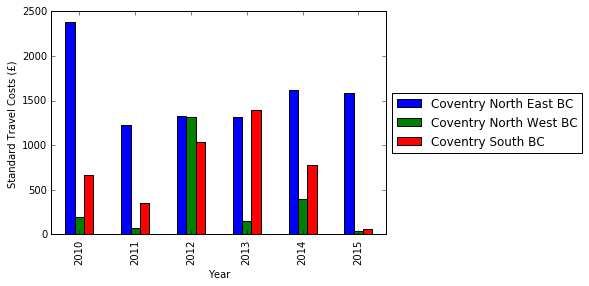

In [14]:
# Calculating yearly total standard travel costs by Coventry constituency
YearlyS = Std.groupby(["MP's Constituency", "Year"])['Amount Paid'].sum()
ax = YearlyS.unstack().T.plot(kind='bar')
ax.set_ylabel(u'Standard Travel Costs (£)')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

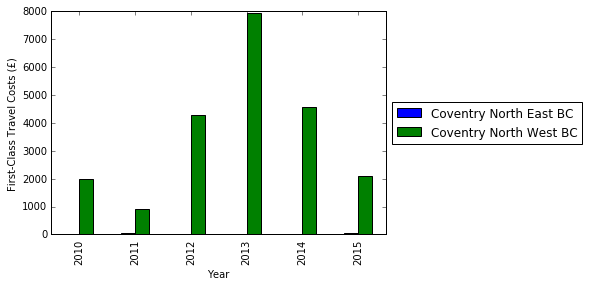

In [15]:
YearlyF = First.groupby(["MP's Constituency", "Year"])['Amount Paid'].sum()
ax = YearlyF.unstack().T.plot(kind='bar')
ax.set_ylabel(u'First-Class Travel Costs (£)')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

As we can see, the first class claims made by Mr. Robinson dwarf the standard rate claims, and so it is clear that these excess of first class claims are costing the taxpayer money. Indeed, he claims over 150 % more than the next expensive Coventry constituency, Coventry North East.

In [16]:
Std.groupby(["MP's Constituency"])["Amount Paid"].sum()

MP's Constituency
Coventry North East BC    9447.25
Coventry North West BC    2169.95
Coventry South BC         4283.95
Name: Amount Paid, dtype: float64

In [17]:
First.groupby(["MP's Constituency"])["Amount Paid"].sum()

MP's Constituency
Coventry North East BC       84.0
Coventry North West BC    21746.6
Name: Amount Paid, dtype: float64

For balance, I should also point out that Geoffrey Robinson did claim <em>significantly</em> less money on accommodation costs (around £75,0000 less) than the other two Coventry MPs (whether this has anything to do with his famed <a href='http://news.bbc.co.uk/1/hi/uk_politics/1312456.stm'>Park Lane penthouse apartment</a> in central London, we may never know). Whatever the deal with the lower accommodation costs, it is clear that the expenses claimed on his train travel between London and Coventry could have been much lower. 

In [18]:
# Make everything lower case, so we can search for 'accommodation'
Total['Category'] = Total.Category.str.lower()
# Filtering out info on Coventry MPs' accommodation expenses
Accom = Total[(Total.Category.str.contains("accommodation")) &
          (Total["MP's Constituency"].str.contains("Coventry"))]
Accom = Accom.groupby(["MP's Constituency"])['Amount Paid'].sum()
Accom.sort_values(ascending=False)

MP's Constituency
Coventry North East BC    79535.8
Coventry South BC         76640.6
Coventry North West BC     1920.0
Name: Amount Paid, dtype: float64

So, it appears that Mr. Robinson is claiming a significantly greater proportion of first class tickets in comparison to his Coventry colleagues, but what about all the other MPs? I decided to have a look at the average percentage of first class travel made by MPs from all UK constituencies. It appears that Geoffrey Robinson is by no means the worst offender on this front. Over 99 % of all train travel made by the Tynemouth MP Alan Campbell has been in a first class carriage. Geoffrey Robinson is back in 33rd place, with a mere 87.3 % of train travel made using a first class ticket. 

What is noticeable, though, is how close Coventry is to London in comparison with all the other constituencies in the top/worst 40. With the exception of Leicestershire South, the constituencies are several hours away by train, normally in northern England. Coventry, though, is a little over an hour away by train. 

As before, once I hear from Geoffrey Robinson, I will update this document with any response that I receive. 

In [19]:
# Looking at average over all journeys made by MPs from all Constituencies
TStd = Total[(Total['Travel'] == "Standard") & (Total['Status'] == "Paid")]
TFirst = Total[(Total['Travel'] == "First") & (Total['Status'] == "Paid")]
FirstSum = TFirst.groupby(["MP's Constituency"])['Travel'].count()
StdSum = TStd.groupby(["MP's Constituency"])['Travel'].count()
First_Percent_Ave = 100. * FirstSum / (FirstSum + StdSum)
# Convert index to ranking number
AveFirstPercent = First_Percent_Ave.fillna(0).sort_values(ascending=False)
AveFirstPercent = AveFirstPercent.reset_index()
AveFirstPercent.index += 1
AveFirstPercent.head(50)

,MP's Constituency,Travel
1,Tynemouth BC,99.065421
2,Louth and Horncastle CC,98.979592
3,Lichfield CC,98.360656
4,Sedgefield CC,98.220641
5,Warrington North BC,97.938144
6,Bolton North East BC,97.860963
7,Jarrow BC,97.849462
8,Blackley and Broughton BC,96.887160
9,Gateshead BC,96.534653
10,Leeds East BC,95.864662


So, after playing around with a panda dataframe for a while, practising filtering, plotting and grouping entries, I think I shall leave it there. As I said, there is a lot of ways to analyse the data available, but my main aim with this was simply to use the pandas module. I may add some extra stuff later on if I find anything of interest. 

So, using pandas, I was able to filter down the expenses claims made by UK MPs to look at claims made by individual MPs, and compare them with other MPs within a geographic area. I was also able to filter out claims made for specific reasons, such as accommodation and travel expenses. I also discovered that my MP seems to like travelling first class, which I have asked him about and will update this post once I have received a reply. 

### ** Update **

Whilst I haven't received any reply from my MP, I have noticed that the local newspaper have picked up the <a href='http://www.coventrytelegraph.net/news/coventry-news/coventry-mp-geoffrey-robinson-among-11822574'>story</a>. From the quotes in this article, he doesn't sound particularly repentent! 

Whilst it is clear by looking at the list of first class travellers above, it can be seen that most of the constituencies are quite far away from London, it would probably be easier to visualise on a map, and so I have added this below.

In [20]:
# Tiding up the column names and constituency names
AveFirstPercent["MP's Constituency"] = AveFirstPercent["MP's Constituency"].map(lambda x: x.rsplit(' ', 1)[0])
AveFirstPercent.columns = ['area', 'First']

,area,First
1,Tynemouth,99.065421
2,Louth and Horncastle,98.979592
3,Lichfield,98.360656
4,Sedgefield,98.220641
5,Warrington North,97.938144


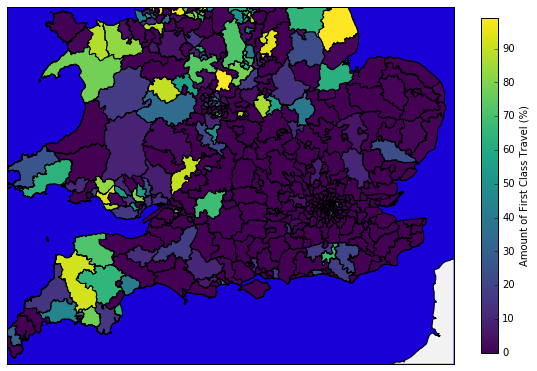

In [21]:
# Draw map of UK
fig, ax = plt.subplots(figsize=(10,20))
m = Basemap(resolution='h', # c, l, i, h, f or None
            projection='merc', 
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=-5.32, llcrnrlat=49.9,urcrnrlon=1.89, urcrnrlat=53.47)
             
m.drawmapboundary(fill_color='#1800d6')
m.fillcontinents(color='#f2f2f2',lake_color='#1800d6')
m.drawcoastlines()

# Read in Westminster Constituency shape file
m.readshapefile('./Data/WestminsterConstituencies', 'areas')

# Create pandas dataframe of constituencies 
# (rsplitting to remove last two words area name)
df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.areas],
        'area': [area['NAME'].rsplit(' ', 2)[0] for area in m.areas_info]
        })

df_poly = df_poly.merge(AveFirstPercent, on='area', how='left')

# Create colourmap, fill in constituency polygons with % First-class travel
cmap = plt.get_cmap('viridis')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['First'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['First'])
cbar = plt.colorbar(mapper, shrink=0.3, ticks=range(0, 101, 10))
cbar.set_label('Amount of First Class Travel (%)')

m

As we can see from the figure above, there is a large region of dark purples that is centred around London. This corresponds to constituencies where the MP travels standard class the vast majority of time. Further away from London and where there are relatively poor transport links, such as in the south-west, north Wales and the Lincolnshire coast, the percentage of first class journeys is very high. 

However, we can also see the Coventry North West constituency as a small, but bright, hot-spot near the centre of the image. The map shows not only how close the constituency is to London, but also how much higher the first class claim rates are compared to neighbouring constituencies (South Leicestershire - to the east - notwithstanding). 

It should also be noted that the large yellow blob in Gloucestershire is the constituency of the Forest of Dean. Whilst it may seem only slightly further away from London the Coventry is, according to Google, the distance between Cinderford (where the constituency office is) and London takes around 3 hours on public transport - three times longer than the Coventry to London travel time, so they really aren't comparable. 